In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=4)

In [3]:
from sklearn.datasets import make_blobs
# make_blobs() 샘플데이터를 만드는 함수

# n_samples=데이터의 갯수
# n_features=차원의 수(1,2,3..n차원 데이터)
# centers=중심점의 갯수
# cluster_std=데이터의 분산정도

In [4]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

### 각 데이터들

In [5]:
data[0][:10]

array([[ -6.42884095,  10.14111739],
       [  5.86867888,   5.20110356],
       [ -0.37610937,   3.26427943],
       [  2.16679181,   9.56300522],
       [  5.0950857 ,   7.20752718],
       [-10.87888819,  -6.1131804 ],
       [  2.03405554,   9.76664755],
       [ -1.71798771,   1.4140114 ],
       [  1.16911341,   8.24556988],
       [ -1.35185444,   3.13245345]])

### 각 데이터의 label(어느 그룹에 속했는지)

In [6]:
data[1][:10]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0])

### 각 데이터의 1차원 데이터와 2차원 데이터를 xy로 표시

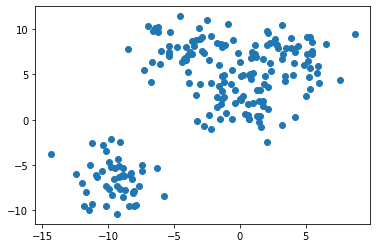

In [8]:
plt.scatter(data[0][:,0], data[0][:,1])

### 표시한 데이터를 각 데이터별 label에 따라 색을 다르게 함

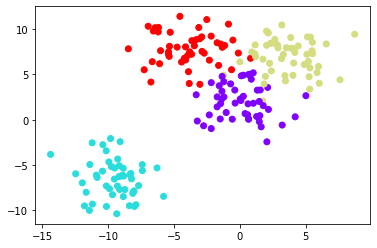

In [7]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [9]:
km.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
km.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3])

In [11]:
km.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

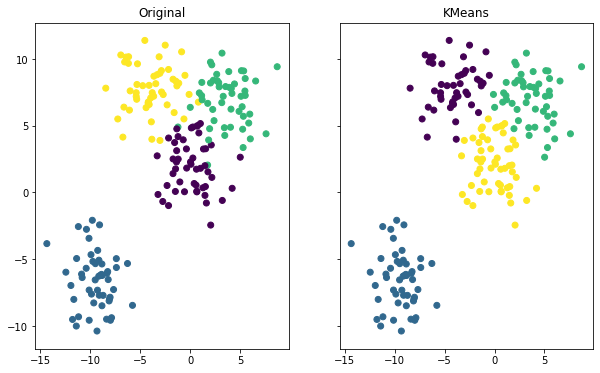

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
ax2.set_title('KMeans')
ax2.scatter(data[0][:,0], data[0][:,1], c=km.labels_)
ax1.set_title('Original')
ax1.scatter(data[0][:,0], data[0][:,1], c=data[1])

# ============================================================================
# ============================================================================

In [36]:
df1 = pd.read_csv('./csvfiles/mldata/College_Data.csv', index_col=0)

In [39]:
df = pd.get_dummies(df1, drop_first=True)

In [40]:
df2 = df1.drop('Private', axis=1)

In [44]:
df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [45]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=2)

In [46]:
km.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
df2['label'] = km.labels_

In [48]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [50]:
df2[df2['label'] == 1][:5]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,label
Antioch University,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48,1
Appalachian State University,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,1
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,1
Auburn University-Main Campus,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,1
Baylor University,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72,1


In [51]:
private_label = pd.read_csv('./csvfiles/mldata/College_Data.csv')['Private'].replace({'Yes':1, 'No':0})

In [53]:
np.mean(df2.label.values != private_label.values)

0.7786357786357786

In [54]:
df21 = df2[df2['label'] == 1]
df20 = df2[df2['label'] == 0]

In [55]:
abs((df20.mean() - df21.mean())/(df20.mean()+df21.mean())).sort_values(ascending=False)

label          1.000000
F.Undergrad    0.712986
Apps           0.702172
Enroll         0.679136
Accept         0.671560
P.Undergrad    0.610852
Top10perc      0.242235
Expend         0.226748
Personal       0.144886
Top25perc      0.135297
PhD            0.101732
Terminal       0.079855
perc.alumni    0.071697
Books          0.046809
Room.Board     0.037087
Grad.Rate      0.018634
Outstate       0.015319
S.F.Ratio      0.002557
dtype: float64

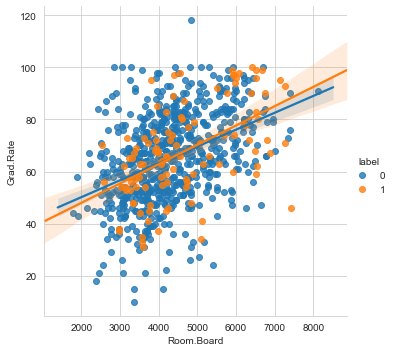

In [56]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board', 'Grad.Rate', data=df2, hue='label')

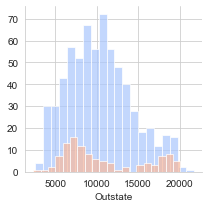

In [57]:
g = sns.FacetGrid(df2, hue='label', palette='coolwarm')
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

In [58]:
private_label = pd.read_csv('./csvfiles/mldata/College_Data.csv')['Private'].replace({'Yes':1, 'No':0})

In [61]:
np.mean(df2.label.values == private_label.values)

0.22136422136422138

In [62]:
df2 = pd.read_csv('./csvfiles/mldata/College_Data.csv', index_col=0)
df2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [63]:
y= df2['Private'].replace({'Yes':1, 'No':0})

In [64]:
x= df2.drop('Private', axis=1)

In [65]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.3, random_state=777) 

In [66]:
from sklearn.svm import SVC
svc = SVC()

In [67]:
svc.fit(x_train,y_train)
predictions = svc.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.71      1.00      0.83       165

    accuracy                           0.71       234
   macro avg       0.35      0.50      0.41       234
weighted avg       0.50      0.71      0.58       234



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        69
           1       0.93      0.90      0.91       165

    accuracy                           0.88       234
   macro avg       0.85      0.86      0.86       234
weighted avg       0.88      0.88      0.88       234



In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions2 = rfc.predict(x_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        69
           1       0.94      0.97      0.95       165

    accuracy                           0.93       234
   macro avg       0.93      0.91      0.92       234
weighted avg       0.93      0.93      0.93       234



In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        69
           1       0.93      0.90      0.91       165

    accuracy                           0.88       234
   macro avg       0.85      0.86      0.86       234
weighted avg       0.88      0.88      0.88       234



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
